In [22]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import review_preprocess
print("Setup Done...")

Setup Done...


### Loading dataset

In [2]:
train_file_name = 'drugsComTrain_raw.csv'
test_file_name = 'drugsComTest_raw.csv'
file_path = './data/'

df_test = pd.read_csv(file_path+test_file_name)
df_train = pd.read_csv(file_path+train_file_name)

### Checking for NAN or na values

In [7]:
train_na = df_train.isna().values
np.argwhere(train_na==True).shape
print("values with nan ", np.argwhere(train_na==True).shape)

train_null = df_train.isnull().values
print("values with null",np.argwhere(train_null==True).shape)

# check if the NAN and null values are at same place
print("values are same" if (train_na == train_null).prod()==1 else "values are different")


values with nan  (899, 2)
values with null (899, 2)
values are same


In [21]:
x = np.argwhere(train_na==True)
len(np.delete(x,1,1))

899

### Figure out what colums have missing values

In [8]:
missing_indexes = np.argwhere(train_na==True)

# unique_cols with missing data
missing_cols = np.unique(missing_indexes[:,1])
for m_c in missing_cols:
    print('Index of missing columns ->', m_c, \
          '\nName of missing columns ->',df_train.columns[m_c],'\n\n')
# so we can see only column name condition is missing


Index of missing columns -> 2 
Name of missing columns -> condition 




In [9]:
# Print top 5 rows of missing index, to check the type o missing values (MAR,MCAR,NMAR)
missing_rows = missing_indexes[:,0]
print("Total missing values rows : ", len(missing_rows))
for r in missing_rows[:5]:
    print("------------------------------------------------------")
    print("------------------------------------------------------")
    print(df_train.iloc[r]['review'])
#     print(df_train.iloc[r])    #------uncomment line for full view of row
    print("------------------------------------------------------")
    print("------------------------------------------------------\n\n")
    


Total missing values rows :  899
------------------------------------------------------
------------------------------------------------------
"Very good response. It is so useful for me. "
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"Accurate information."
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"So far so good. Good for me and I can take it everyday. Can't remember the last time I slept 7 hours straight."
------------------------------------------------------
------------------------------------------------------


------------------------------------------------------
------------------------------------------------------
"I have

In [10]:

wc = WordCloud(bac, stopwords=STOPWORDS).generate(df_train.review[0])
plt.imshow(wc)

# ' '.join(text2['Crime Type'])

NameError: name 'bac' is not defined

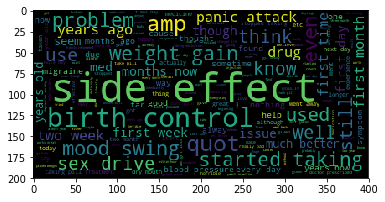

In [11]:
wc = WordCloud(stopwords=STOPWORDS).generate(' '.join(df_train['review']))
plt.imshow(wc)